IMPORTANDO BIBLIOTECAS

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Realizando leitura dos dados

In [2]:
df_idade = pd.read_csv ('data/dados_idade_aposentadoria.csv')
df_altura = pd.read_csv ('data/dados_alturas.csv')
df_vida_lampada = pd.read_csv ('data/dados_vida_lampada.csv')

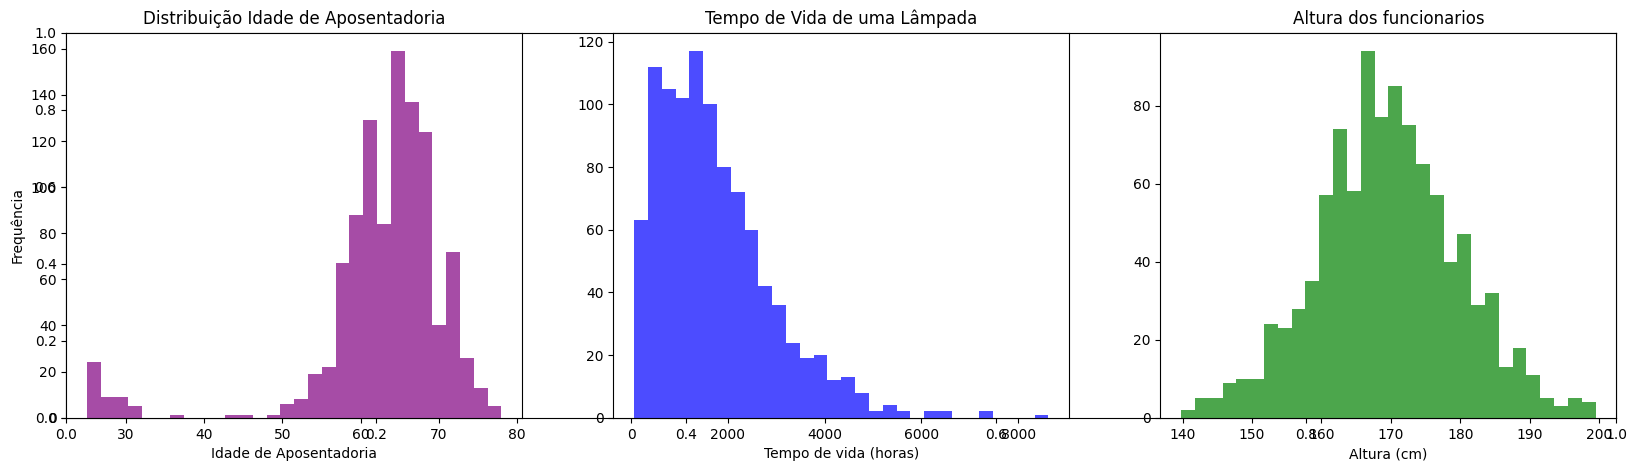

In [3]:
plt.subplots (figsize=(20,5))
plt.subplot(131)
plt.title('Distribuição Idade de Aposentadoria')
plt.xlabel ('Idade de Aposentadoria')
plt.ylabel ('Frequência')
plt.hist (df_idade, bins=30, alpha=0.7, color='purple')

plt.subplot(132)
plt.hist(df_vida_lampada, bins=30, alpha=0.7, color='blue')
plt.title('Tempo de Vida de uma Lâmpada')
plt.xlabel ('Tempo de vida (horas)')

plt.subplot (133)
plt.hist (df_altura, bins=30, alpha=0.7, color='green')
plt.title ('Altura dos funcionarios')
plt.xlabel ('Altura (cm)')

plt.show ()

In [4]:
#tamanho da amostra
n=100

#quantidade de amostras
qnt=100000

#função de reamostragem

def reamostraem_medias (dados, coluna, n, qnt):
    medias = [dados[coluna].sample(n, replace=True).mean()
              for _ in range (qnt)]
    
    return medias


In [5]:
df_altura.head()

,alturas
0,167.52
1,185.21
2,172.74
3,171.52
4,157.75


In [6]:
media_aposentadoria = reamostraem_medias(df_idade, 'idade', n, qnt)
media_altura = reamostraem_medias(df_altura, 'alturas', n, qnt)
media_vida_lampada = reamostraem_medias(df_vida_lampada, 'duracao', n, qnt)

In [7]:
print ('''  Médias populacionais    ''')

print ('idade', df_idade['idade'].mean())
print ('duracao', df_vida_lampada['duracao'].mean())
print ('altura', df_altura['alturas'].mean())

  Médias populacionais    
idade 62.70857142857143
duracao 1731.8036029420002
altura 169.52022


In [8]:
def avg (list):
    return sum(list) / len(list)

print ('''  Médias amostrais    ''')

print ('idade', avg (media_aposentadoria))
print ('duracao', avg (media_vida_lampada))
print ('altura', avg (media_altura))

  Médias amostrais    
idade 62.70460129999968
duracao 1732.4446689301753
altura 169.52250438099992


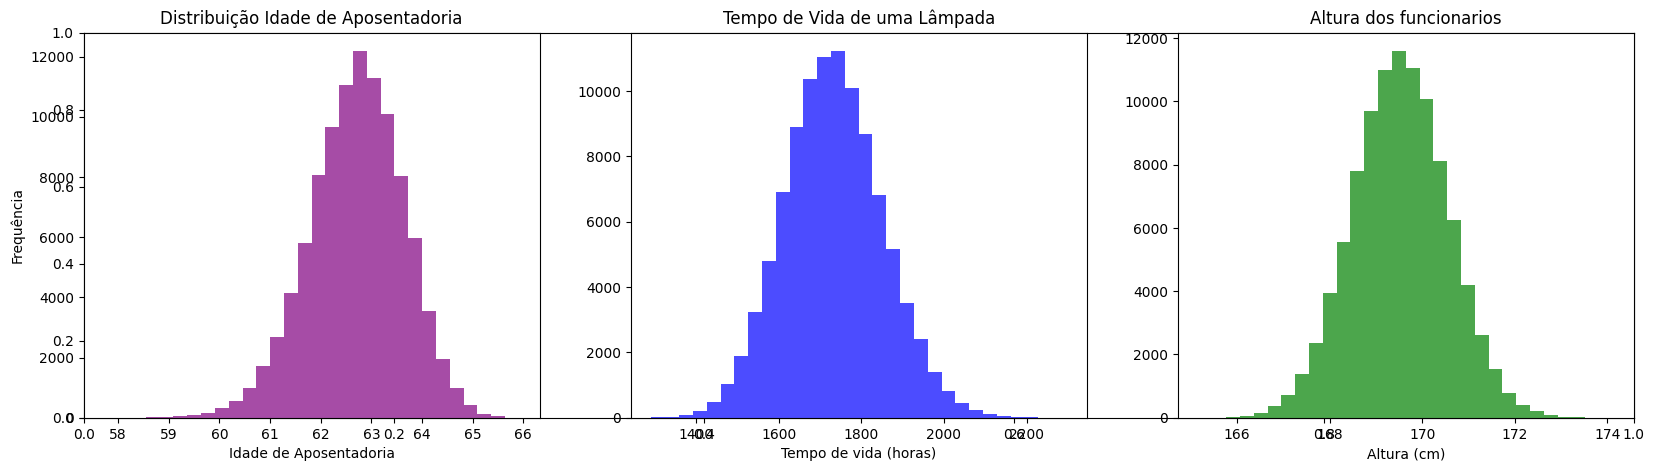

In [9]:
plt.subplots (figsize=(20,5))
plt.subplot(131)
plt.title('Distribuição Idade de Aposentadoria')
plt.xlabel ('Idade de Aposentadoria')
plt.ylabel ('Frequência')
plt.hist (media_aposentadoria, bins=30, alpha=0.7, color='purple')

plt.subplot(132)
plt.hist(media_vida_lampada, bins=30, alpha=0.7, color='blue')
plt.title('Tempo de Vida de uma Lâmpada')
plt.xlabel ('Tempo de vida (horas)')

plt.subplot (133)
plt.hist (media_altura, bins=30, alpha=0.7, color='green')
plt.title ('Altura dos funcionarios')
plt.xlabel ('Altura (cm)')

plt.show ()

In [10]:
media_nova_amostra = 1200

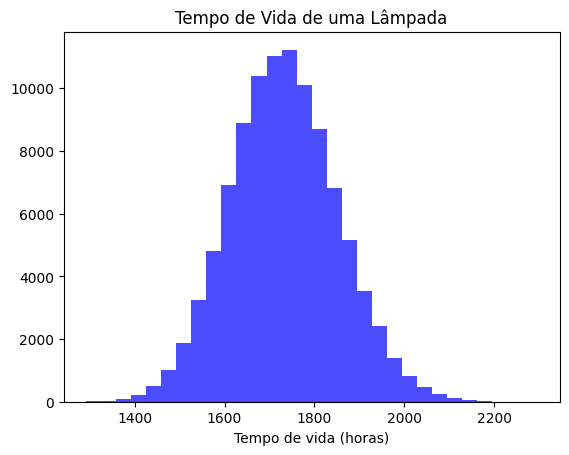

In [11]:
plt.hist(media_vida_lampada, bins=30, alpha=0.7, color='blue')
plt.title('Tempo de Vida de uma Lâmpada')
plt.xlabel ('Tempo de vida (horas)')
plt.annotate('.', xy=(media_nova_amostra, 0), xytext=(media_nova_amostra, 100), fontsize=8,
            arrowprops=dict(facecolor='green'))
plt.show()

In [12]:
duracao_amostra = pd.DataFrame ({'medias_duracao': media_vida_lampada})

In [13]:
media_das_medias = duracao_amostra['medias_duracao'].mean()
ep = duracao_amostra['medias_duracao'].std()

print ('''  Médias amostrais    ''')

print ('Média', media_das_medias)
print ('erro padrao', ep)

  Médias amostrais    
Média 1732.444668930188
erro padrao 118.77648668826178


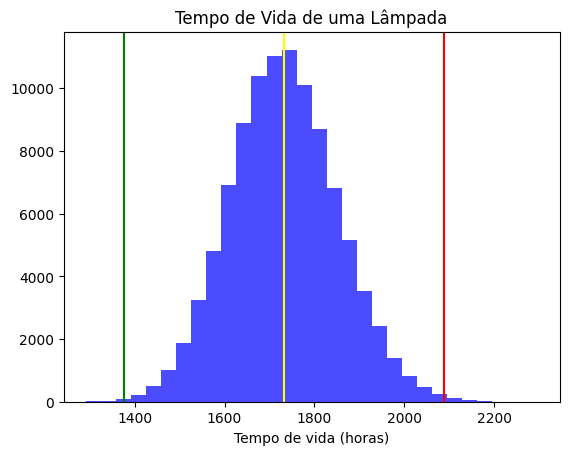

In [14]:
plt.hist(media_vida_lampada, bins=30, alpha=0.7, color='blue')
plt.title('Tempo de Vida de uma Lâmpada')
plt.xlabel ('Tempo de vida (horas)')
plt.axvline (media_das_medias, color='Yellow')
plt.axvline (media_das_medias + 3*ep, color='Red')
plt.axvline (media_das_medias - 3*ep, color='Green')
plt.annotate('.', xy=(media_nova_amostra, 0), xytext=(media_nova_amostra, 100), fontsize=8,
            arrowprops=dict(facecolor='green'))
plt.show()

In [15]:
qnt_obs = duracao_amostra[(duracao_amostra > media_das_medias - 3*ep) & (duracao_amostra < media_das_medias + 3*ep)]


In [16]:
qnt_obs.count()/duracao_amostra.count()*100

medias_duracao    99.721
dtype: float64

In [66]:
from scipy import stats

In [18]:
df_vida_lampada

confianca = 0.95

In [20]:
media = df_vida_lampada['duracao'].mean()


AULA 02

In [21]:
h0 = 1570

In [26]:
df_natalinas = pd.read_csv ("data/experimento_lampadas_natalinas.csv")
df_natalinas.head()

,Unnamed: 0,duracao
0,0,1541.121474
1,1,1523.495329
2,2,1521.732707
3,3,1523.280091
4,4,1530.643374


In [29]:
df_natalinas.drop(columns="Unnamed: 0")

,duracao
0,1541.121474
1,1523.495329
2,1521.732707
3,1523.280091
4,1530.643374
...,...
95,1523.112501
96,1528.213843
97,1513.689417
98,1532.400532


In [33]:
media = df_natalinas["duracao"].mean()
print (media.round())

1530.0


In [36]:
confianca = 0.95 #nivel de confianca desejado
desvio_padrao_populacional = 105 #desvio padrao dado pela empresa
tamanho_amostra = len(df_natalinas)

In [37]:
intervalo = stats.norm.interval (confianca, loc= h0, scale= desvio_padrao_populacional/ np.sqrt(tamanho_amostra))

In [38]:
print(intervalo)

(np.float64(1549.4203781623294), np.float64(1590.5796218376706))


In [52]:
# importando o teste Z do statsmodels
from statsmodels.stats.weightstats import ztest

In [65]:
# executando o teste z
statos, p_valor = ztest(x1 = df_natalinas['duracao'], value = 1570, alternative = "two-sided")

In [56]:
print (stats)

-45.732770207263556


In [57]:
if p_valor < 0.05:
    print ("Rejeita h0")
else:
    print ("Aceita h0")

Rejeita h0


In [58]:
import pandas as pd

# Conjunto de dados TechTaste
df_techtaste = pd.DataFrame({'avaliacoes': [38, 44, 33, 42, 47, 33, 36, 39, 42, 36, 39, 34, 42, 42, 36, 43, 31, 35, 36, 41, 42, 30, 25, 38, 47, 36, 32, 45, 44, 45, 37, 48, 37, 36, 44, 49, 31, 45, 45, 40, 36, 50, 38, 34, 36, 42, 46, 49, 36, 34, 38, 31, 53, 40, 57, 40, 36, 42, 26, 50, 32, 43, 35, 37, 42, 30, 36, 43, 40, 43, 44, 52, 37, 51, 35, 47, 40, 50, 37, 49]})

In [68]:
m = df_techtaste['avaliacoes'].mean()
h0 = 30
confianca = 0.95
dp = 2.65
tam_amostra = len(df_techtaste)

In [76]:
statos, p_valor = ztest (x1= df_techtaste['avaliacoes'], value=h0, alternative = "two-sided")

In [69]:
intervalo = stats.norm.interval (confianca, loc=h0, scale= dp/ np.sqrt(tam_amostra))
intervalo

(np.float64(29.419303816868016), np.float64(30.580696183131984))

In [70]:
print (m)

40.025


In [79]:
if p_valor < 0.05:
    print ("Rejeita h0")
else:
    print ("Aceita h0")

Rejeita h0


AULA 03